# Recunoastere Semne
## Laborator Takai 2022

In [171]:
import glob
import cv2
import random as random
import numpy as np
import matplotlib.pyplot as plt

# Incarcare si Prelucrare baza de date

### 1) Citire imagini

- avem 4 clase
- fiecare clasa are 10 poze

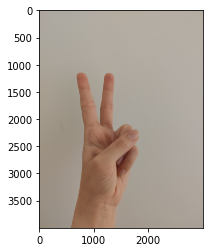

In [172]:
base_path = "E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/"

image_path_by_class = []

for i in range(4):
    c_p = base_path + str(i) + "/" + "*.jpg"
    image_path_by_class.append(glob.glob(c_p))
    
# print(image_path_by_class)

test_img = cv2.imread(image_path_by_class[3][2])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)

array([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
       ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1'],
       ['2', '2', '2', '2', '2', '2', '2', '2', '2', '2'],
       ['3', '3', '3', '3', '3', '3', '3', '3', '3', '3']], dtype='<U1')

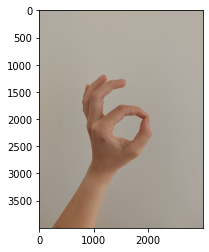

In [173]:
random.seed(42)
#
### amestecam baza de date  ###
for a in image_path_by_class:
    random.Random(42).shuffle(a)

# print(image_path_by_class)

test_img = cv2.imread(image_path_by_class[0][1])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(test_img)

# Salvam si labels
labels = []
for class_path in image_path_by_class:
  tmp = []
  for img_path in class_path:
    label = img_path.split('/')[7]
    label = label.split("\\")[0]
    tmp.append(label)
  labels.append(tmp)

labels=np.array(labels)
labels

### 2) Impartire pe train si test

In [174]:
train_path = []
test_path = []

label_train = labels[:,:7] # y_train
label_test = labels[:,7:] # y_test

# print(label_train)
# print(label_test)

for a in image_path_by_class:
    clasa_t = []
    clasa_v = []
    for index, elem in enumerate(a):
        # print(index, elem)
        if(index < 7):
            clasa_t.append(elem)
        else:
            clasa_v.append(elem)
    train_path.append(clasa_t)
    test_path.append(clasa_v)
            
print(len(train_path[0]), len(test_path[0]))
# print("----------")
print(test_path)

7 3
[['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/0\\ (4).jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/0\\ (1).jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/0\\ (10).jpg'], ['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/1\\ (4).jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/1\\ (1).jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/1\\ (10).jpg'], ['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/2\\ (4).jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/2\\ (1).jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/2\\ (10).jpg'], ['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/3\\ (4).jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/3\\ (1).jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/My_Images/3\\ (10).jpg']]


In [175]:

train = []
test = []

for cls in train_path:
    images = []
    for elem in cls:
        img = cv2.imread(elem)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    train.append(images)
    
for cls in test_path:
    images = []
    for elem in cls:
        img = cv2.imread(elem)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    test.append(images)

Text(0.5, 1.0, 'Test 1 din clasa 3')

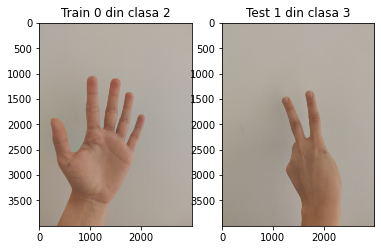

In [176]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[2][0])
plt.title("Train 0 din clasa 2")
plt.subplot(1,2,2)
plt.imshow(test[3][1])
plt.title("Test 1 din clasa 3")

### 3) Micsoram imaginile

In [177]:
print(np.shape(test[0][0]))

h,w,c = test[0][0].shape
new_h = h // 4
new_w = w // 5
print(new_h, new_w)

for i, cls in enumerate(train):
    for j, imagine in enumerate(cls):
        r = cv2.resize(imagine, (new_w,new_h))
        train[i][j] = r
        
for i, cls in enumerate(test):
    for j, imagine in enumerate(cls):
        r = cv2.resize(imagine, (new_w,new_h))
        test[i][j] = r

(4000, 3000, 3)
1000 600


Text(0.5, 1.0, 'Test 2 din clasa 0')

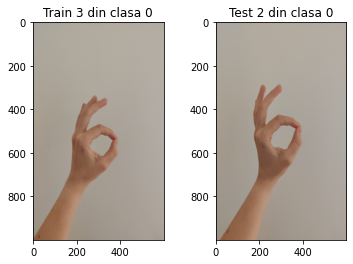

In [178]:
test_cls = 0
train_img = 3
test_img = 2

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[test_cls][train_img])
plt.title("Train {} din clasa {}".format(train_img,test_cls))
plt.subplot(1,2,2)
plt.imshow(test[test_cls][test_img])
plt.title("Test {} din clasa {}".format(test_img,test_cls))

### 4) Prelucrare 

- imaginile au prea multa informatie de culoare
- vom lucra scoate fundalul pentru a lucra doar cu mainile

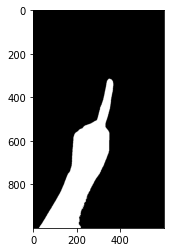

In [179]:
def condition(img, draw = 0):
    R,G,B = np.split(img,indices_or_sections=3, axis=2)
    C1 = (R> 95) & (G>40) & (B>20) # nuantele generale de piele
    # compoenentele r,g,b nu trebuie sa fie prea aproape unul de altul => eliminam griurile
    C2 = ((np.vstack([R,G,B]).max(axis=0) - np.vstack([R,G,B]).min(axis=0) > 15))
    # componentele rosu si verde sa nu fie prea apropiate intre ele
    C3 = (np.abs(R-G) > 15)
    # cea mai puternica nuanta trebuie sa fie rosu fiind piele
    C4 = (R>G)&(R>B)

    # restul sunt conditii de iluminant
    C5 = (R>220) & (G>210) & (B>170)
    C6 = (np.abs(R-G) <= 15)
    C7 = (R>B) & (G>B)
    
    # combinam toate conditiile
    # in general un pixel se considera a fi de culoare pielii daca se respecta conditia de mai jos
    # cond1 = np.logical_or((C1 * C2 * C3 * C4) , (C4 * C5 * C6 * C7))
    cond1 = (C1 * C2 * C3 * C4) + (C4 * C5 * C6 * C7)
    cond1[cond1 > 1] = 1 
    
    # masca
    if draw == 1:
        plt.figure()
        plt.imshow (cond1,cmap='gray')
    
    return cond1.squeeze(axis=2)
    # return cond1

img_copy = train[1][1]
masca =condition(img_copy, 1)
# plt.figure()
# plt.imshow (masca,cmap='gray')

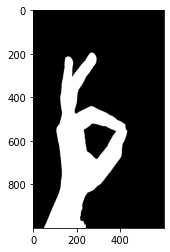

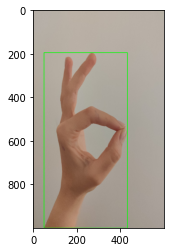

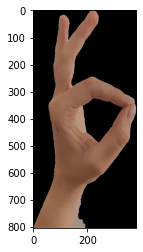

In [180]:
def segmentare_imagine(img, draw = 0):
  img_copy = img.copy()
  
  #cream masca pentru culoarea pielii
  mask = condition(img, draw)
  
  # cautam mai multe contururi in imagine
  contours, hierarchy = cv2.findContours(mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
  # cautam bounding box-ul cu cea mai mare arie
  dreptunghi = None
  maxArea = 0
  indice = 0
  for i,cont in enumerate(contours):
    # x,y,w,h = cv2.boundingRect(cont)
    tmp = cv2.boundingRect(cont)
    if maxArea < tmp[2] * tmp[3]:
      maxArea = tmp[2] * tmp[3]
      dreptunghi = tmp
      indice = i

  # dreptunghi[0] - x
  # dreptunghi[1] - y
  # dreptunghi[2] - w
  # dreptunghi[3] - h
  
  # desenam bounding box-ul pe imagine
  cv2.rectangle(img_copy,(dreptunghi[0],dreptunghi[1]),(dreptunghi[0]+dreptunghi[2],dreptunghi[1]+dreptunghi[3]),(0,255,0),2)
  
  if draw == 1:
    plt.figure()
    plt.imshow(img_copy, cmap='gray')
  
  
  x = dreptunghi[0] 
  y = dreptunghi[1]
  w = dreptunghi[2] 
  h = dreptunghi[3]
  
  # redimensionare imagine dupa bbox gasit
  img_copy = img_copy[ y : y + h, x : x + w ]
  mask = mask[ y : y + h, x : x + w ]

  # segmentarea 
  img_copy[mask==0] = 0
 
  return img_copy


new_img = segmentare_imagine(train[0][0], 1)
plt.figure()
plt.imshow(new_img, cmap='gray')


# Descriptori

### HOG

(756,)


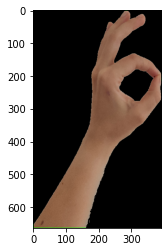

In [181]:

# # dimensiune : 756
winSize = (32,32) # is the size of the image cropped to an multiple of the cell size
blockSize = (32,32) #dimensiunea blocului de celule, i.e numarul de celule
blockStride = (16,16) # stride-ul cu care se misca blocul de celule
cellSize = (16,16) # dimensiunea unei celule din imagine


# # # dimensiune: 9360
# winSize = (32,32) # is the size of the image cropped to an multiple of the cell size
# blockSize = (32,32) #dimensiunea blocului de celule, i.e numarul de celule
# blockStride = (8,8) # stride-ul cu care se misca blocul de celule
# cellSize = (8,8) # dimensiunea unei celule din imagine


nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

def extract_descriptor(img,height=128,width=64, show_print=0):
  img_copy = img.copy()
  img_copy = cv2.resize(img_copy,(width,height))
  descriptor = hog.compute(img_copy) 
  if show_print:
    print(descriptor.shape)

  return descriptor

aux_img = train[0][3].copy()
aux_img = segmentare_imagine(aux_img)
extract_descriptor(aux_img,show_print=1)

plt.figure()
plt.imshow(aux_img,cmap='gray')

### Scheletul Imaginii
schelet = imagine erodata pana ce ajunge la grosimea de 1px dar fara sa piarda info esentiala

(1000, 600)


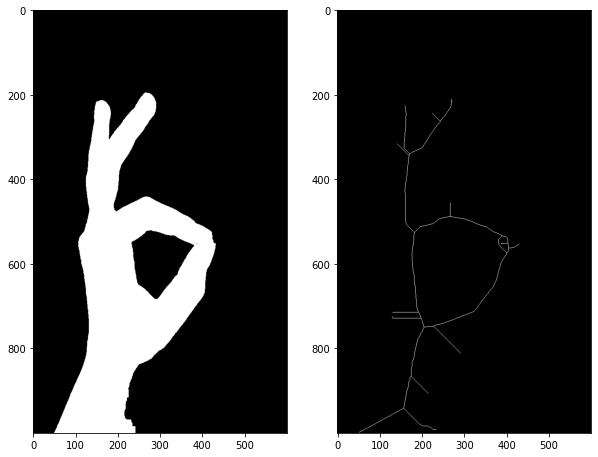

In [182]:
from skimage.morphology import skeletonize

mask = condition(train[0][0])
# plt.figure()
# plt.imshow(mask, cmap='gray')

print(mask.shape)

mask2 = skeletonize(mask, method='zhang')
plt.figure(figsize=(10,20))
plt.subplot(121);plt.imshow(mask,cmap='gray')
plt.subplot(122);plt.imshow(mask2,cmap='gray')



(8192,)


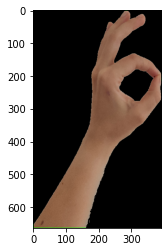

In [183]:
def schelet_descriptor(img,height=128,width=64, show_print=0):
  img_copy = img.copy()
  img_copy = cv2.resize(img_copy,(width,height))
  mask = condition(img_copy)

  descriptor = skeletonize(mask, method='zhang')
  descriptor = descriptor.flatten()
  if show_print:
    print(descriptor.shape)

  return descriptor

aux_img = train[0][3].copy()
aux_img = segmentare_imagine(aux_img)
schelet_descriptor(aux_img,show_print=1)

plt.figure()
plt.imshow(aux_img,cmap='gray')

### Aplicam masca pe toate imaginile si calculam descriptorii 

4
7
756


<Figure size 432x288 with 0 Axes>

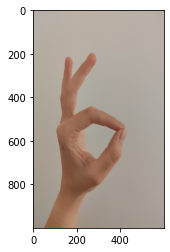

In [184]:
### Aplicam masca pe toate imaginile

train_set = []
test_set = []
plt.figure()
plt.figure()
plt.imshow(train[0][0])

for img_class in train:
    aux = []
    for img in img_class:
        img_seg = segmentare_imagine(img)
        descriptor = extract_descriptor(img_seg)  ## HOG
        # descriptor = schelet_descriptor(img_seg)  ## schelet imagine
        aux.append(descriptor) # fiecare poza are un descriptor
    train_set.append(aux) # fiecare clasa va primi descriptorii pozelor 
        
        
        
# train_set : 
# format din 4 clase cu cate 7 imagini, fiecare cu cate un descriptor de 756 elem
print(len(train_set))
print(len(train_set[1]))
print(len(train_set[1][0]))
# print(train_set[0][1][1])

In [185]:
test_set = []

for img_class in test:
    aux = []
    for img in img_class:
        img_seg = segmentare_imagine(img)
        descriptor = extract_descriptor(img_seg)
        # descriptor = schelet_descriptor(img_seg)
        aux.append(descriptor) # fiecare poza are un descriptor
    test_set.append(aux) # fiecare clasa va primi descriptorii pozelor
    
# test_set : 
# format din 4 clase cu cate 3 imagini, fiecare cu cate un descriptor de 756 elem
print(len(test_set))
print(len(test_set[1]))    
print(len(test_set[1][0]))    

4
3
756


In [186]:
train_set = np.array(train_set)
label_train = label_train.reshape(-1,1)
train_set = train_set.reshape(28,-1)
print(train_set.shape)
print(label_train.shape)
print(type(label_train))

(28, 756)
(28, 1)
<class 'numpy.ndarray'>


# KNN

k-Nearest Neighbour (kNN) este cel mai simplu algoritm de clasificare pentru invatarea supervizata.

In [187]:
# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0,100,(28,2)).astype(np.float32)
# Label each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(28,1)).astype(np.float32)

# y_train = np.array(['0', '0', '0', '0', '0', '0', '0', 
#            '1', '1', '1', '1', '1', '1', '1',
#            '2', '2', '2', '2', '2', '2', '2', 
#            '3', '3', '3', '3', '3', '3','3']).astype(np.float32)

label_train = label_train.astype(np.float32)
train_set = train_set.astype(np.float32)
# print(train_set)

# print(trainData.shape)
# print(y_train.shape)
# print(responses.shape)

# newcomer = np.random.randint(0,756,(1,2)).astype(np.float32)
# print(newcomer.shape)

knn = cv2.ml.KNearest_create()
knn.train(train_set, cv2.ml.ROW_SAMPLE, label_train)

True

In [188]:
## Testare KNN
true_images = 0
for i,descriptor_class in enumerate(test_set):
  for descriptor_img in descriptor_class:
    descriptor_img = np.array(descriptor_img).astype(np.float32)
    descriptor_img = descriptor_img.reshape(1,-1)
    # print(descriptor_img)
    
    label, results, neighbours ,dist = knn.findNearest(descriptor_img,k=3)
    
    print('semnul prezis   : ',label)
    print('semnul adevarat : ',i)
    
    if i==label:
      true_images+=1

total_images = (len(test_set)*len(test_set[0]))
false_images = total_images - true_images

print( f'Acuratete: {100 * true_images / total_images} %')

semnul prezis   :  0.0
semnul adevarat :  0
semnul prezis   :  0.0
semnul adevarat :  0
semnul prezis   :  0.0
semnul adevarat :  0
semnul prezis   :  1.0
semnul adevarat :  1
semnul prezis   :  1.0
semnul adevarat :  1
semnul prezis   :  1.0
semnul adevarat :  1
semnul prezis   :  2.0
semnul adevarat :  2
semnul prezis   :  3.0
semnul adevarat :  2
semnul prezis   :  2.0
semnul adevarat :  2
semnul prezis   :  3.0
semnul adevarat :  3
semnul prezis   :  3.0
semnul adevarat :  3
semnul prezis   :  3.0
semnul adevarat :  3
Acuratete: 91.66666666666667 %


# SVM

In [189]:
## SUPPORT VECTOR MACHINE
import copy 
train_descr_copy = copy.deepcopy(train_set)
y_train_copy = copy.deepcopy(label_train)

train_descr_copy = np.array(train_descr_copy).astype(np.float32)
y_train_copy = y_train_copy.reshape(-1).astype(np.int32)
train_descr_copy = train_descr_copy.reshape(28,-1)

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setDegree(4)
svm.train(train_descr_copy,cv2.ml.ROW_SAMPLE,y_train_copy)

True

In [190]:
## Testare SVM
true_images = 0
for i,desc_class in enumerate(test_set):
  for descr in desc_class:
    descr = np.array(descr).astype(np.float32)
    descr = descr.reshape(1,-1)
    label = svm.predict(descr)[1][0][0]
    print('semnul prezis   : ',label)
    print('semnul adevarat : ',i)
    if i==label:
      true_images+=1

# print(true_images / 12)
total_images = (len(test_set)*len(test_set[0]))
false_images = total_images - true_images
print( f'Acuratete: {100 * true_images / total_images} %')

semnul prezis   :  0.0
semnul adevarat :  0
semnul prezis   :  0.0
semnul adevarat :  0
semnul prezis   :  0.0
semnul adevarat :  0
semnul prezis   :  1.0
semnul adevarat :  1
semnul prezis   :  3.0
semnul adevarat :  1
semnul prezis   :  1.0
semnul adevarat :  1
semnul prezis   :  2.0
semnul adevarat :  2
semnul prezis   :  3.0
semnul adevarat :  2
semnul prezis   :  2.0
semnul adevarat :  2
semnul prezis   :  3.0
semnul adevarat :  3
semnul prezis   :  3.0
semnul adevarat :  3
semnul prezis   :  3.0
semnul adevarat :  3
Acuratete: 83.33333333333333 %
